<a href="https://colab.research.google.com/github/nitpat25/Object-Detection/blob/main/load_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Downloading-->loading-->visualizing
# wget command is a command line utility which helps us download files from the internet directly into colab

In [31]:
    !wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip # Train dataset , you can custom name your files by making changes after -O in the wget command
    !wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip # Validation dataset
    !wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip # Annotation file for Training and Validation dataset

--2023-12-25 15:26:52--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.153.132, 54.231.203.89, 52.216.138.12, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.153.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘coco_train2017.zip’

coco_train2017.zip  100%[===================>]  18.01G  34.8MB/s    in 5m 50s  

2023-12-25 15:32:42 (52.7 MB/s) - ‘coco_train2017.zip’ saved [19336861798/19336861798]

--2023-12-25 15:32:42--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.29.133, 3.5.28.175, 52.216.114.115, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.29.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[=============

In [ ]:
# prompt: extract the files from zip folder to custom folder locations

!mkdir coco
!unzip coco_train2017.zip -d coco
!unzip coco_val2017.zip -d coco
!unzip coco_ann2017.zip -d coco


Streaming output truncated to the last 5000 lines.
 extracting: coco/train2017/000000260166.jpg  
 extracting: coco/train2017/000000009321.jpg  
 extracting: coco/train2017/000000449865.jpg  
 extracting: coco/train2017/000000089115.jpg  
 extracting: coco/train2017/000000451356.jpg  
 extracting: coco/train2017/000000495149.jpg  
 extracting: coco/train2017/000000405628.jpg  
 extracting: coco/train2017/000000465066.jpg  
 extracting: coco/train2017/000000058268.jpg  
 extracting: coco/train2017/000000545676.jpg  
 extracting: coco/train2017/000000011241.jpg  
 extracting: coco/train2017/000000308838.jpg  
 extracting: coco/train2017/000000543492.jpg  
 extracting: coco/train2017/000000357578.jpg  
 extracting: coco/train2017/000000399490.jpg  
 extracting: coco/train2017/000000166244.jpg  
 extracting: coco/train2017/000000160628.jpg  
 extracting: coco/train2017/000000244823.jpg  
 extracting: coco/train2017/000000445192.jpg  
 extracting: coco/train2017/000000050995.jpg  
 extracti

In [29]:
# prompt: to delete zip folders

!rm -rf coco_train2017.zip
!rm -rf coco_val2017.zip
!rm -rf coco_ann2017.zip


In [35]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import skimage.io as io
import random

# Specify the paths to the COCO annotations and images directories
dataDir = './coco'
dataType = 'train2017'  # or 'val2017' for the validation set
annFile = f'{dataDir}/annotations/instances_{dataType}.json'
imgDir = f'{dataDir}/{dataType}'

# Initialize the COCO API for the specified data type
coco = COCO(annFile)

loading annotations into memory...
Done (t=36.95s)
creating index...
index created!


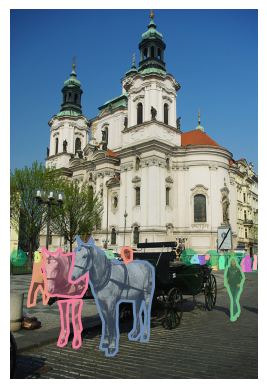

In [42]:
def load_random_img(id = None, showAnns = False):

    # Get all image ids in the dataset
    imgIds = coco.getImgIds()

    # Pick a random image ID
    random_img_id = random.choice(imgIds)
    if id:
        random_img_id = imgIds[id]

    # Load and display a random sample image with annotations
    img_info = coco.loadImgs(random_img_id)[0]
    img_path = f"{imgDir}/{img_info['file_name']}"

    # Load the image using skimage.io
    img = io.imread(img_path)

    # Load and display annotations
    if showAnns:
        annIds = coco.getAnnIds(imgIds=random_img_id)
        anns = coco.loadAnns(annIds)

    # Display the image with annotations
    plt.imshow(img)
    if showAnns:
        coco.showAnns(anns)
    plt.axis('off')
    plt.show()

load_random_img(id = 90, showAnns=True)

In [ ]:
# start next step...
